In [ ]:
# installing dependencies
!pip install sodapy

In [ ]:
from sodapy import Socrata
import pandas as pd


# Fetching data
client = Socrata('data.melbourne.vic.gov.au', None)
results = client.get('b2ak-trbp', limit=3482938)
df = pd.DataFrame.from_records(results)


In [ ]:
# Datetime conversion
df['date'] = df['year'] + '-' + df['month'] + '-' + df['mdate'] 
df['date'] = pd.to_datetime(df['date'])
df.drop(columns=['id',	'date_time','year',	'month',	'mdate',	'day',	'time' ], inplace = True)
#converting 'sensor_id' and 'hourly_counts' to int
df[['sensor_id','hourly_counts']] = df[['sensor_id','hourly_counts']].astype('int')
df

,sensor_id,sensor_name,hourly_counts,date
0,34,Flinders St-Spark La,300,2019-11-01
1,39,Alfred Place,604,2019-11-01
2,37,Lygon St (East),216,2019-11-01
3,40,Lonsdale St-Spring St (West),627,2019-11-01
4,36,Queen St (West),774,2019-11-01
...,...,...,...,...
3482933,68,Flinders Ln -Degraves St (North),0,2020-12-31
3482934,69,Flinders Ln -Degraves St (Crossing),0,2020-12-31
3482935,70,Errol Street (East),7,2020-12-31
3482936,71,Westwood Place,22,2020-12-31


In [ ]:
# getting daily pedestrian count
daily_df = df.groupby(['date'], as_index=False)['hourly_counts'].sum()
daily_df.rename(columns={'hourly_counts':'Total_Pedestrian_Count'}, inplace=True)
daily_df.to_csv('Pedcount_per_day.tsv',index=False,sep='\t')

<function matplotlib.pyplot.show>

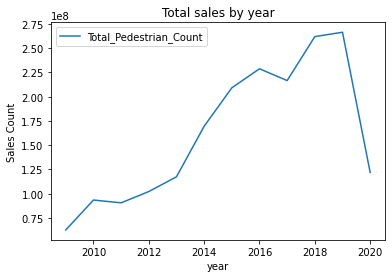

In [ ]:
# Yearly Count Visualization
from matplotlib import pyplot as plt

viz_df = daily_df.copy()
viz_df['year'] = viz_df['date'].dt.year
year_sales = viz_df.groupby(['year'], as_index=False)['Total_Pedestrian_Count'].sum()
year_sales.plot(kind='line', x='year',y='Total_Pedestrian_Count')
plt.ylabel('Sales Count')
plt.title('Total sales by year')
plt.show

In [ ]:
# Merging with weather data